## Examples


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

A little style from the previous session.

In [2]:
import json
import brewer2mpl

data = json.loads(open('mplrc.json','r').read())
for x in data.keys():
    try:
        mpl.rcParams[x] = data[x]
    except ValueError:
        pass
        
colors = brewer2mpl.get_map('Set1', 'qualitative', 8).mpl_colors
mpl.rcParams['axes.color_cycle'] = colors

### The `line` graph

plt.plot?

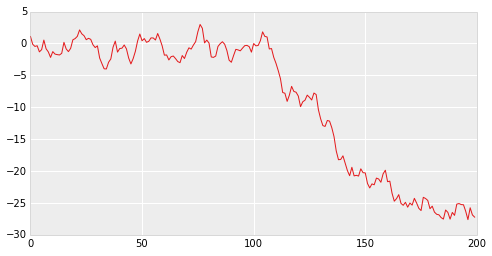

In [3]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(200).cumsum())
fig.show()

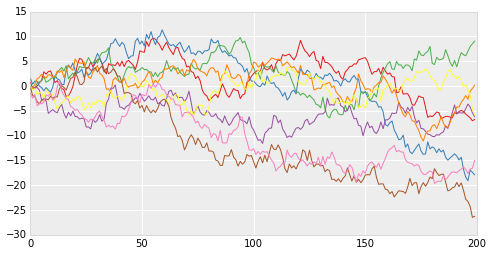

In [4]:
fig, ax = plt.subplots()
for i in range(8):
    ax.plot(np.random.randn(200).cumsum())
fig.show()

### Histogram

?plt.hist

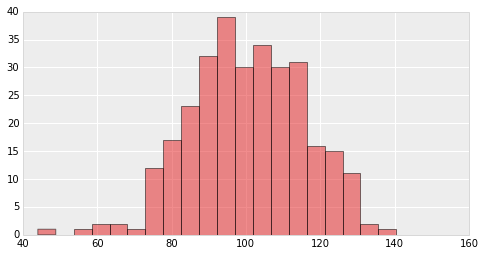

In [5]:
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(300)

fig, ax = plt.subplots()
ax.hist(x, alpha=0.5, bins=20)
fig.show()

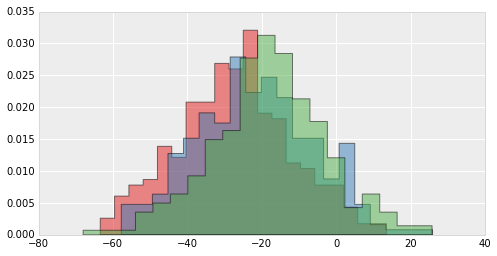

In [6]:
fig, ax = plt.subplots()
for i in range(3):
    x = 20.0*np.random.randn() + sigma*np.random.randn(300)
    ax.hist(x, normed=1, alpha=0.5, histtype='stepfilled', bins=20)
fig.show()

### Kernel Density Estimates

In [7]:
from sklearn.neighbors.kde import KernelDensity

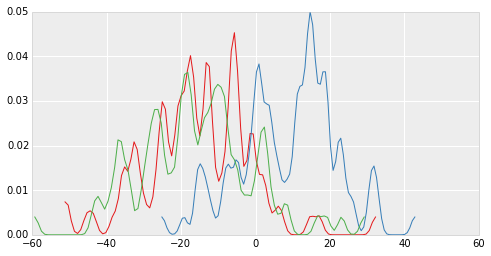

In [8]:
fig, ax = plt.subplots()
for i in range(3):
    
    data = 20.0*np.random.randn() + sigma*np.random.randn(100)
    x = np.linspace(data.min(), data.max(), 100)

    # For sklearn
    data = data.reshape(-1, 1)
    x = x.reshape(-1, 1)
    
    kde = KernelDensity().fit(data)  # you can adjust the 'bandwidth' parameter
    density = np.exp(kde.score_samples(x))
    ax.plot(x, density)

fig.show()

### `Scipy.stats`

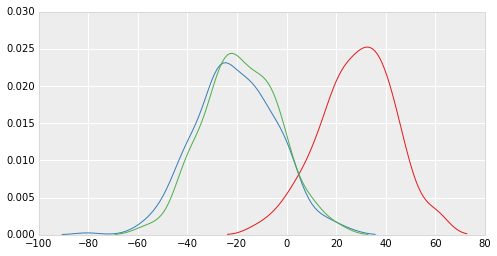

In [9]:
from scipy import stats

fig, ax = plt.subplots()
for i in range(3):
    
    x = 20.0*np.random.randn() + sigma*np.random.randn(300)
    xd = np.linspace(min(x)-10, max(x)+10, 100)
    density = stats.kde.gaussian_kde(x)
    ax.plot(xd, density(xd))
    
fig.show()

### `fill_between`

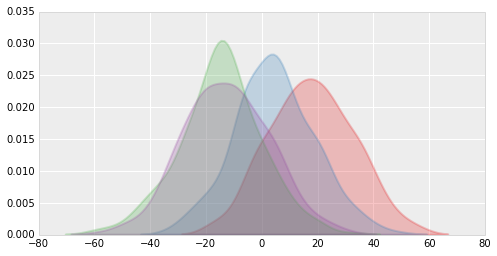

In [10]:
import itertools
colors = itertools.cycle(mpl.rcParams['axes.color_cycle'])

fig, ax = plt.subplots()
for i in range(4):
    
    x = 20.0*np.random.randn() + sigma*np.random.randn(300)
    xd = np.linspace(min(x)-10, max(x)+10, 100)
    density = stats.kde.gaussian_kde(x)
    
    ax.fill_between(xd, 0, density(xd), alpha=0.25, color=next(colors), linewidth=2)
    
fig.show()

### Combined `hist` and `kde`

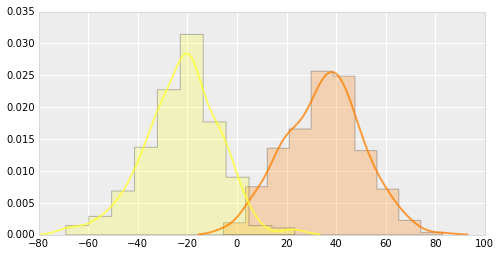

In [11]:
fig, ax = plt.subplots()
for i in range(2):
    
    x = 20.0*np.random.randn() + sigma*np.random.randn(300)
    xd = np.linspace(min(x)-10, max(x)+10, 100)
    density = stats.kde.gaussian_kde(x)
    c = next(colors)
    
    ax.hist(x, normed=1, alpha=0.25, color=c, histtype='stepfilled')
    ax.plot(xd, density(xd), alpha=0.75, color=c, linewidth=2)
    
fig.show()

### Bar charts

Adapted from [Harvard CS109](http://nbviewer.ipython.org/github/cs109/content/blob/master/lec_03_statistical_graphs.ipynb).

What is misleading about this plot?

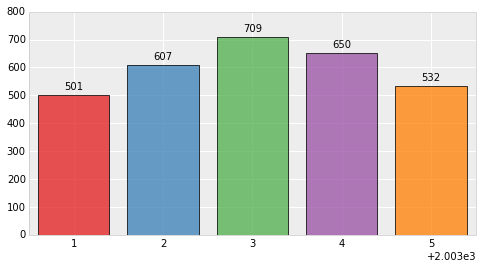

In [12]:
years = [2004, 2005, 2006, 2007, 2008]
heights = [501, 607, 709, 650, 532]
box_colors = mpl.rcParams['axes.color_cycle']  

fig, ax = plt.subplots()

ax.bar(np.array(years)-0.4, heights, color=box_colors, alpha=0.75)

ax.set_xlim(2003.5, 2008.5)
ax.set_ylim(0,800)

for x, y in zip(years, heights):
    plt.annotate('{0}'.format(y), (x, y + 20), ha='center')

fig.show()

### The `box` plot

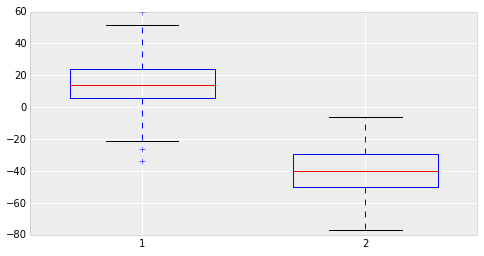

In [13]:
fig, ax = plt.subplots()

d1 = 20.0*np.random.randn() + sigma*np.random.randn(300)
d2 = 20.0*np.random.randn() + sigma*np.random.randn(300)

data = [d1, d2]
bp = ax.boxplot(data, widths=0.65)

fig.show()

### Error bars

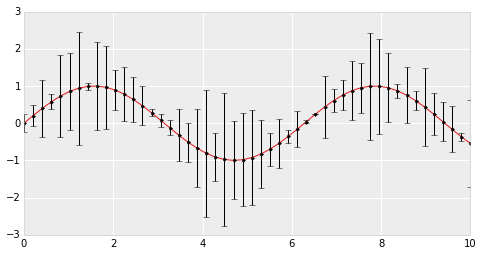

In [14]:
x = np.linspace(0, 10, 50)
xerr = np.random.normal(np.sin(x), 0.4)
y = np.sin(x)

fig, ax = plt.subplots()

ax.plot(x, y)
ax.errorbar(x, y, xerr, fmt='.k')

fig.show()

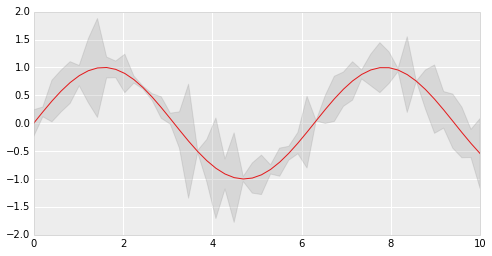

In [15]:
fig, ax = plt.subplots()

ax.plot(x, y)
ad = abs(y-xerr)
ax.fill_between(x, y - ad, y + ad, color='0.5', alpha=0.2)

fig.show()

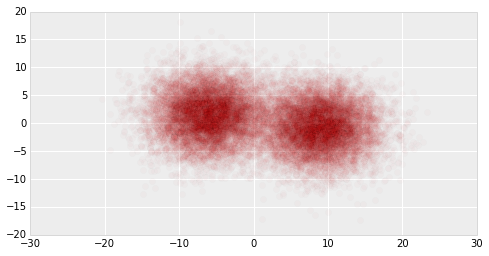

In [16]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=20000, centers=2, random_state=37, cluster_std=4)
x = X[:,0]
y = X[:,1]

fig, ax = plt.subplots()

ax.plot(x,y, 'o', alpha=0.02)

fig.show()

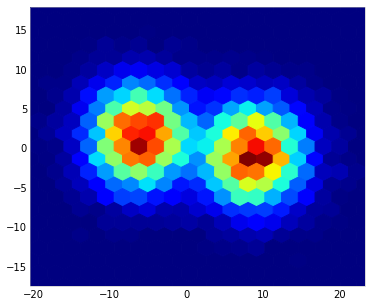

In [17]:
fig, ax = plt.subplots(figsize=(6,5))

ax.hexbin(x, y, gridsize=20)

fig.show()

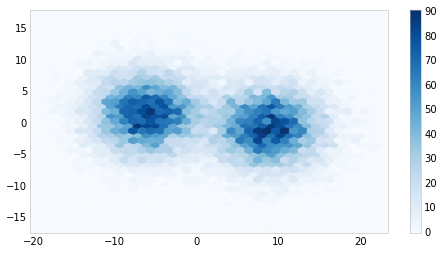

In [18]:
blues=plt.get_cmap('Blues')

fig, ax = plt.subplots()

tmp = ax.hexbin(x, y, gridsize=40, cmap=blues)
fig.colorbar(tmp, ax=ax)
fig.show()

### Contour

Create a simple surface.

In [19]:
x = np.linspace(-1, 1, 50)
y = np.linspace(-2, 2, 50)

X, Y = np.meshgrid(x, y)
z = X*X + Y*Y + X*Y

Default countour.

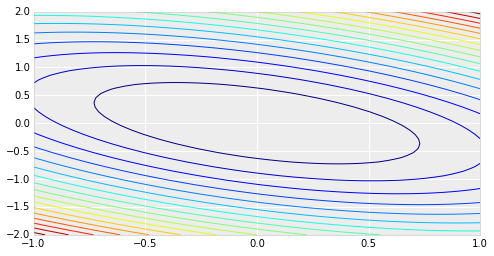

In [20]:
fig, ax = plt.subplots()

ax.contour(x, y, z, 20)

fig.show()

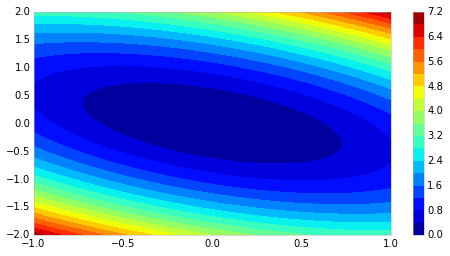

In [21]:
fig, ax = plt.subplots()

con = ax.contourf(x, y, z, 20)

fig.colorbar(con, ax=ax)
fig.show()

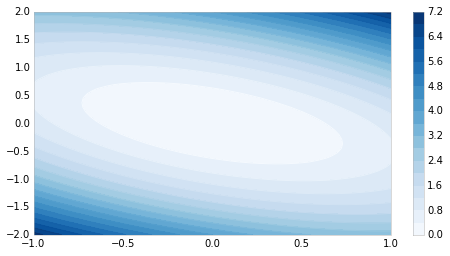

In [22]:
fig, ax = plt.subplots()

tmp = ax.contour(x, y, z, 20, cmap=blues, alpha=0.9)
con = ax.contourf(x, y, z, 20, cmap=blues, alpha=1.)

fig.colorbar(con, ax=ax)
fig.show()

### False-color

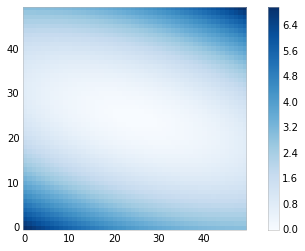

In [23]:
fig, ax = plt.subplots()

im = ax.imshow(z, cmap=blues, interpolation='nearest', origin='lower')
ax.grid(False)
#tmp = ax.contour(z, 20)

fig.colorbar(im, ax=ax)
fig.show()